# Forecasting with Auto ARIMA in Python

## ARIMA Overview

ARIMA is a popular statistical time series forecasting method. ARIMA stands for (A)uto-(R)egressive (I)ntegrated (M)oving (A)verages. Here is a breakdown of what each of these terms mean:

- *Auto Regressive*: This essentially means ARIMA looks back at historical data to help predict the next data point. Think of this as a lag term in the model (how far back are we looking to help predict the next data point). In ARIMA, the "AR" term is also referred to as 'p' and can be manually set by looking at PACF plots.
- *Integrated*: This term in ARIMA refers to the differencing of values in a time series dataset. This helps transform the series into a stationary series. When a time series is stationary, the mean stays approximately the same. There is no trend upward or downward over time. In ARIMA, the "I" is also referred to as 'd'. An ADF test can help determine if a series is stationary.
- *Moving Averages*: The Moving Averages component of ARIMA is essentially a window. This component looks at previous values to help gauge the trend of the series. In ARIMA, this term is referred to as 'q' and can manually be set by looking at ACF plots.

For seasonal data, you can use a version of ARIMA called sARIMA. Which uses a 'seasonal' component to help generate a model.

Wouldn't it be convenient if there was a function that automatically tried to estimate these parameters for you, so you can just get a forecast quickly and easily? Well there is! Those of you that have used R for forecasting may know the `auto.arima` function in the `forecast` package. Now there is also a similar function in Python thanks to the `pmdarima` library. We will use this library and auto ARIMA function to keep things simple in this post.

## Code Example

### Library Imports

In [1]:
# Data Library
import numpy as np

# ARIMA library
import pmdarima as pm

# Visualization Library
import matplotlib.pyplot as plt

### Load Dataset

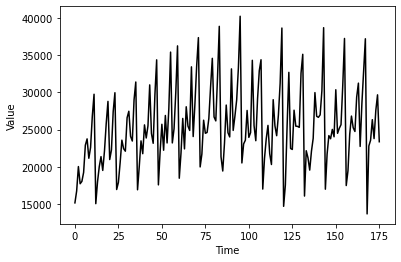

In [2]:
# Loading some sample data using the pmdarima library
training_data = pm.datasets.load_wineind()

# Visualize the sample data
time = np.arange(training_data.shape[0])
plt.plot(time, training_data, c = 'black')
# Set axis labels
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Here we can see our sample data over time.

### Create an ARIMA model

Now let's finally create an ARIMA model using auto ARIMA in Python with the `pmdarima` library.

In [3]:
# Fit the ARIMA model with auto generated parameters and use the seasonal component.
model = pm.auto_arima(training_data, seasonal=True, m=12)

# Set number of points to forecast as h
h = 50
# Generate a forecast
forecast = model.predict(h)

### Visualize Forecast

Now let's look at our forecast along with the training data.

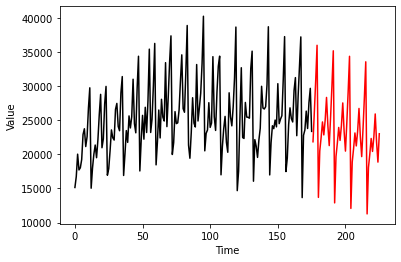

In [4]:
# Visualize forecast with training data
time = np.arange(training_data.shape[0] + h)
# Slice the x-axis to only plot the training data as the color black
plt.plot(time[:training_data.shape[0]], training_data, c = 'black')
# Slice the x-axis to plot our forecast after the training data as the color red
plt.plot(time[training_data.shape[0]:], forecast, c = 'red')
# Set axis labels
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

There we have it! We now have a forecast that takes into consideration previous data points, seasonality, and trend with just a few lines of code.

## Summary

Time series forecasting is a common use case for data scientists to work on, using statistical models or machine learning models to generate forecasts. Using auto ARIMA is a quick way to generate a decent baseline forecast, with a few lines of code. Previously, auto ARIMA was primarily conducted using R's `auto.arima` function, but now thanks to the `pmdarima` Python library we can generate quick forecasts using auto ARIMA in Python as well. There are many ways to forecast data and ARIMA is just one of them. To enhance accuracy, readers should look into other forecasting methods - some common methods include regression models like Generalized Models (Linear or Additive), LSTM models for those that want to explore deep learning approaches, and Decision Tree based methods like XGBoost.

## Links

* [pmdarima Github Repo](https://github.com/alkaline-ml/pmdarima)
* [LinkedIn](https://www.linkedin.com/in/frankie-cancino/)
* [Twitter](https://twitter.com/frankiecancino)